In [2]:
import pandas as pd

file_path = '/jupiter/Salary_Data.csv'
df = pd.read_csv(file_path)

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# checking data types
print(df.dtypes)
print("------------------------------")

# checking for missing values
print(df.isnull().sum())
print("------------------------------")
# summary
print(df.describe())

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
------------------------------
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
------------------------------
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [4]:
# fill the missing data
df.loc[:, 'Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df.loc[:, 'Salary'] = df['Salary'].fillna(df['Salary'].median())
df.loc[:, 'Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
# removing the duplicates
df = df.drop_duplicates()

In [5]:
print(df.describe())
print("------------------------------")
print(df['Job Title'].value_counts())

               Age  Years of Experience         Salary
count  1791.000000          1792.000000    1792.000000
mean     35.128420             9.150112  113181.354353
std       8.209562             6.836391   51525.477657
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000
------------------------------
Job Title
Software Engineer Manager         127
Full Stack Engineer               123
Senior Software Engineer           96
Senior Project Engineer            95
Back end Developer                 81
                                 ... 
Junior Social Media Specialist      1
Developer                           1
Social M                            1
Social Media Man                    1
Delivery Driver                     1
Name: count, Length: 193, dtype: int64


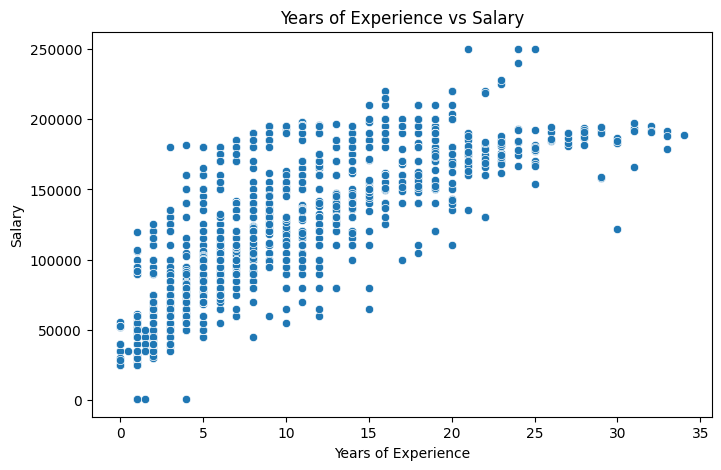

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4828\2144067015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education Level", y="Salary", data=df, errorbar=None, palette="Blues")


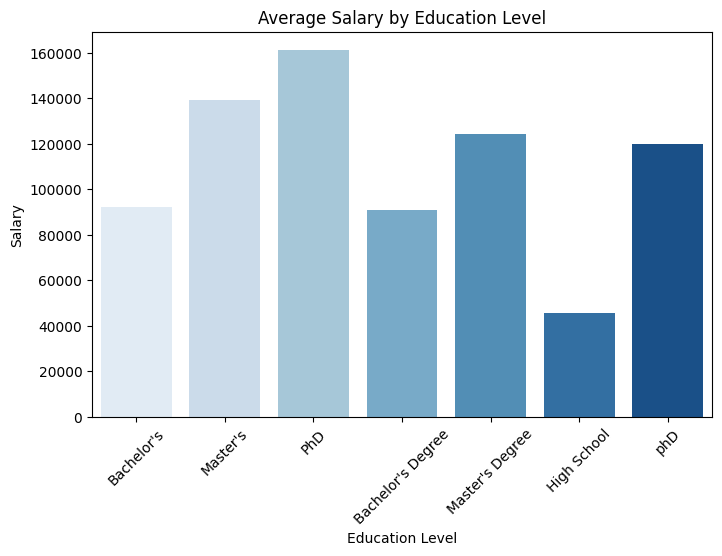

In [7]:
#avg salary by Education level

plt.figure(figsize=(8, 5))
sns.barplot(x="Education Level", y="Salary", data=df, errorbar=None, palette="Blues")
plt.title("Average Salary by Education Level")
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# preparing the dataset
df = pd.get_dummies(df, columns=['Education Level', 'Gender'], drop_first=True)  # One-hot encoding
X = df[['Years of Experience']]
y = df['Salary']

# splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting the salaries
y_pred = model.predict(X_test)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Visualization of Predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'sklearn'